In [ ]:
!pip install asteroid

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.4/156.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 24.0 MB/s eta 0:00:00
  Created wheel for julius: filename=julius-0.2.7-py3-none-any.whl size=21869 sha256=067375719befb41cd8cdeb0c93ad980a076d7c8cc97ec11ad344aa6193be078c
  Stored in directory: /root/.cache/pip/wheels/16/15/d4/edd724cefe78050a6ba3344b8b0c6672db829a799dbb9f81ff
  Created wheel for mir-eval: filename=mir_eval-0.7-py3-none

In [ ]:
%%capture
!wget https://www.merl.com/demos/deep-clustering/media/female-female-mixture.wav

In [ ]:
from IPython.display import display, Audio

display(Audio("female-female-mixture.wav"))

In [ ]:
!asteroid-infer "mpariente/DPRNNTasNet-ks2_WHAM_sepclean" --files female-female-mixture.wav
!echo "-----"
!ls

pytorch_model.bin: 100% 14.7M/14.7M [00:00<00:00, 33.8MB/s]
/usr/local/lib/python3.11/dist-packages/asteroid/models/base_models.py:114: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental fe

In [ ]:
display(Audio("female-female-mixture_est1.wav"))
display(Audio("female-female-mixture_est2.wav"))

In [ ]:
from asteroid.models import BaseModel
import soundfile as sf

# 'Se elige el modelo.
model = BaseModel.from_pretrained("mpariente/DPRNNTasNet-ks2_WHAM_sepclean")

# Se pasa como un arreglo numpy:
mixture, _ = sf.read("female-female-mixture.wav", dtype="float32", always_2d=True)
# Soundfile retorna el mixture como un shape (time, channels), y la libreria Asteroid requiere (batch, channels, time)
mixture = mixture.transpose()
mixture = mixture.reshape(1, mixture.shape[0], mixture.shape[1])
out_wavs = model.separate(mixture)

# Nombre del archivo:
model.separate("female-female-mixture.wav")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/asteroid/models/base_models.py:114: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` wi

In [ ]:
%%capture
!pip install librosa

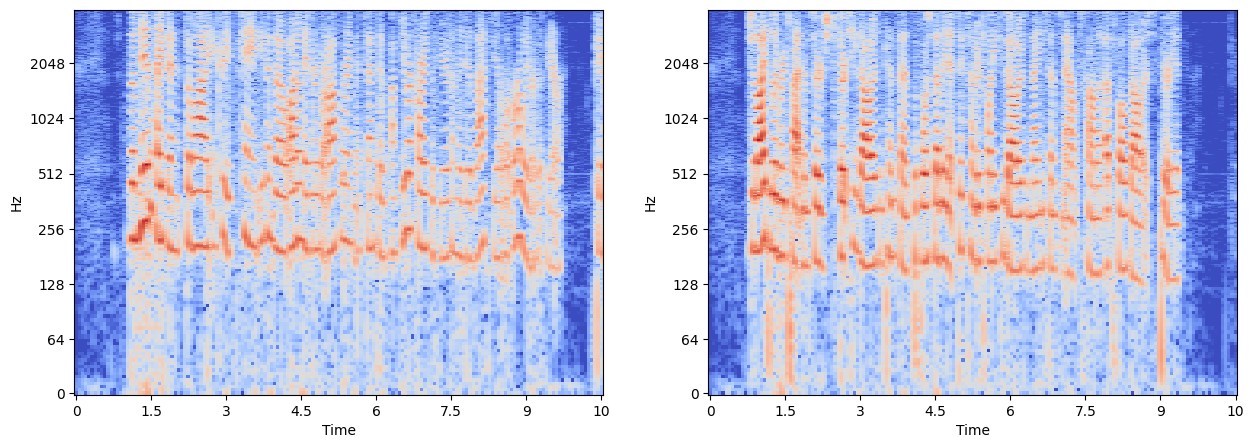

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display


def show_magspec(waveform, **kw):
    return librosa.display.specshow(
        librosa.amplitude_to_db(np.abs(librosa.stft(waveform))),
        y_axis="log", x_axis="time",
        **kw
    )


est1 = sf.read("female-female-mixture_est1.wav")[0]
est2 = sf.read("female-female-mixture_est2.wav")[0]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
show_magspec(est1, sr=8000, ax=ax[0])
show_magspec(est2, sr=8000, ax=ax[1])

In [ ]:
# Dependencias
!pip install git+https://github.com/asteroid-team/asteroid.git@master --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.7/90.7 kB 7.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 35.1 MB/s eta 0:00:00


In [ ]:
%matplotlib inline

In [ ]:
import torch
from asteroid_filterbanks.enc_dec import Filterbank, Encoder, Decoder
from asteroid_filterbanks import FreeFB
import matplotlib.pyplot as plt

In [ ]:
# Inicializa el filterbank
fb = FreeFB(n_filters=256, kernel_size=128, stride=64)
# Realiza el encoder.
encoder = Encoder(fb)
# Realiza el decoder
decoder_fb = FreeFB(n_filters=256, kernel_size=128, stride=64)
decoder = Decoder(decoder_fb)
waveform = torch.randn(1, 1, 32000)  # (batch, channel, wav_lenght)
# Output
spec_like = encoder(waveform)
modif_spec_like = (spec_like.pow(2) + 1).log()
# Realiza un step atras en el decoder
out_waveform = decoder(modif_spec_like)

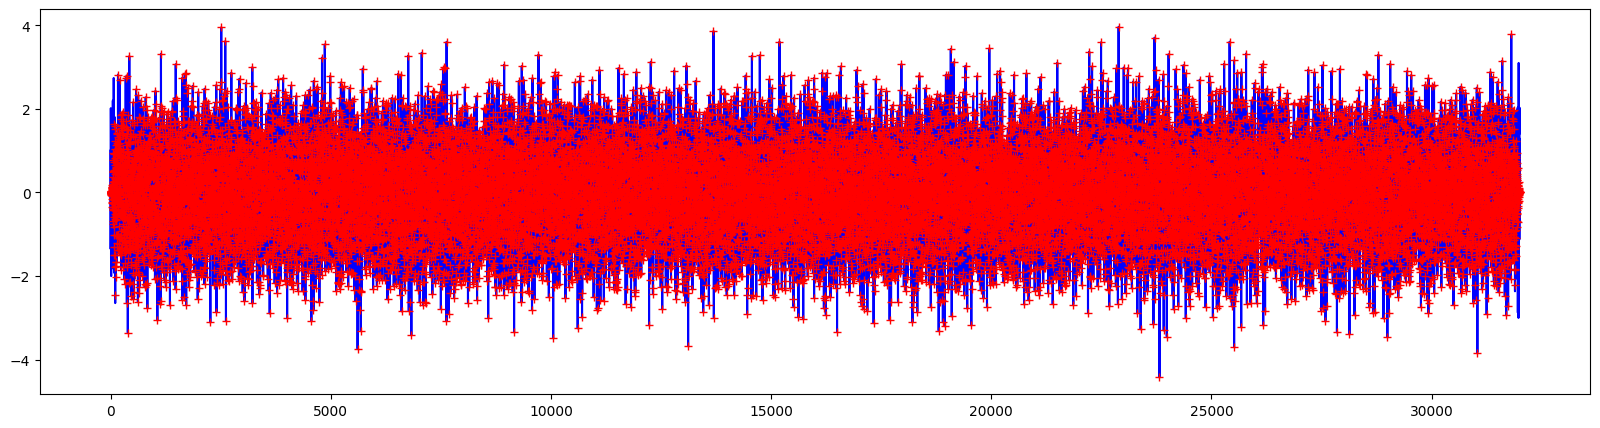

In [ ]:
from asteroid_filterbanks import STFTFB
# Por default, los filtros estan ponderados por la raiz cuadrada de la ventana.
dft_filters = STFTFB(n_filters=512, kernel_size=256, stride=128)
stft = Encoder(dft_filters)
idft_filters = STFTFB(n_filters=512, kernel_size=256, stride=128)
istft = Decoder(idft_filters)

spec = stft(waveform)
out_waveform = istft(spec)

# Grafica el output
fig, axes = plt.subplots(figsize=(20, 5))
axes.plot(waveform.squeeze().data.numpy(), 'b')
axes.plot(out_waveform.squeeze().data.numpy(), 'r+')
plt.show()